In [1]:
from glob import glob
from pprint import pprint
from random import sample

import matplotlib.pyplot as plt
from numpy import mean

import texte

In [2]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


In [3]:
sample_mode = False

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = [e for e in texte.corpora(files) if e.plain]


 30%|██▉       | 908/3065 [00:06<00:13, 165.17it/s]

Empty file: self.path = 'Corpus/Mazarinades/1201-1300/Moreau1240_GALL.xml'


100%|██████████| 3065/3065 [00:20<00:00, 147.19it/s]


In [4]:
import pandas as pd

df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(((txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes),
columns = ["n_pages", "hapax_ratio", "ttr", "lexicalite"])
concat = pd.concat([df0, df], axis=1)

In [5]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [6]:
concat

,form,genre,handwritten_note,table_of_content,illustration,creation,change,titre,dates,subject,subgenre,n_pages,hapax_ratio,ttr,lexicalite
0,prose,"[récit, relation]",False,False,False,1652-07-11,"{'@status': 'corrected', '@when': '2022-07-11'...",Relation véritable de ce qui s'est fait et pas...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,NaN,16285,0.125414,0.728332,0.477839
1,prose,"[récit, relation]",False,False,False,1652-09-26,"{'@status': 'corrected', '@when': '2022-03-18'...",Relation véritable de tout ce qui s'est fait e...,"{'@type': 'file_creation', '@when': '2022-03-0...","[Beaufort, François de Bourbon-Vendôme (1616-1...",NaN,13546,0.148655,0.856835,0.337768
2,prose,"[narration, récit, liste]",False,False,False,1649-03-04,"{'@status': 'corrected', '@when': '2022-09-26'...",Relation véritable de ce qui s'est passé à la ...,"{'@type': 'file_creation', '@when': '2026-04-2...",None,NaN,15285,0.124672,0.747343,0.318103
3,prose,"[récit, relation]",False,False,False,1652-04-28,"{'@status': 'corrected', '@when': '2022-07-12'...",Relation véritable de tout ce qui s'est passé ...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,NaN,22475,0.110743,0.695820,0.454202
4,prose,"[éloge, remerciement, discours adressé]",False,False,False,1650-10-01,"{'@status': 'corrected', '@when': '2022-10-25'...",Remercîment des Rordelois au roi sur le sujet ...,"{'@type': 'file_creation', '@when': '2022-10-2...",NaN,NaN,16167,0.124329,0.750423,0.527876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,prose,"[narration, récit]",False,False,False,1652-03-16,"{'@status': 'corrected', '@when': '2022-09-20'...",La défaite des troupes du sieur de Biron par c...,"{'@type': 'file_creation', '@when': '2026-04-2...",None,NaN,17357,0.128039,0.746587,0.527626
3060,prose,"[texte officiel, déclaration]",False,False,False,1648-04,"{'@status': 'corrected', '@when': '2021-11-16'...","Déclaration du roi, portant révocation de tout...","{'@type': 'file_creation', '@when': '2021-11-0...",NaN,NaN,23486,0.119238,0.753718,0.435979
3061,prose,"[texte officiel, articles, déclaration]",True,False,False,1649-12-11,"{'@status': 'corrected', '@when': '2022-03-10'...",Déclaration du roy.,"{'@type': 'file_creation', '@when': '2022-03-0...",Bordeaux,NaN,17680,0.117639,0.725938,0.488082
3062,prose,"[narration, récit]",False,False,False,1652-05-04,"{'@status': 'corrected', '@when': '2022-09-20'...","La défaite des troupes mazarines, à l’attaque ...","{'@type': 'file_creation', '@when': '2026-04-2...",None,NaN,15316,0.134369,0.768778,0.498945


In [7]:
concat.to_csv("stats.csv", sep=";")


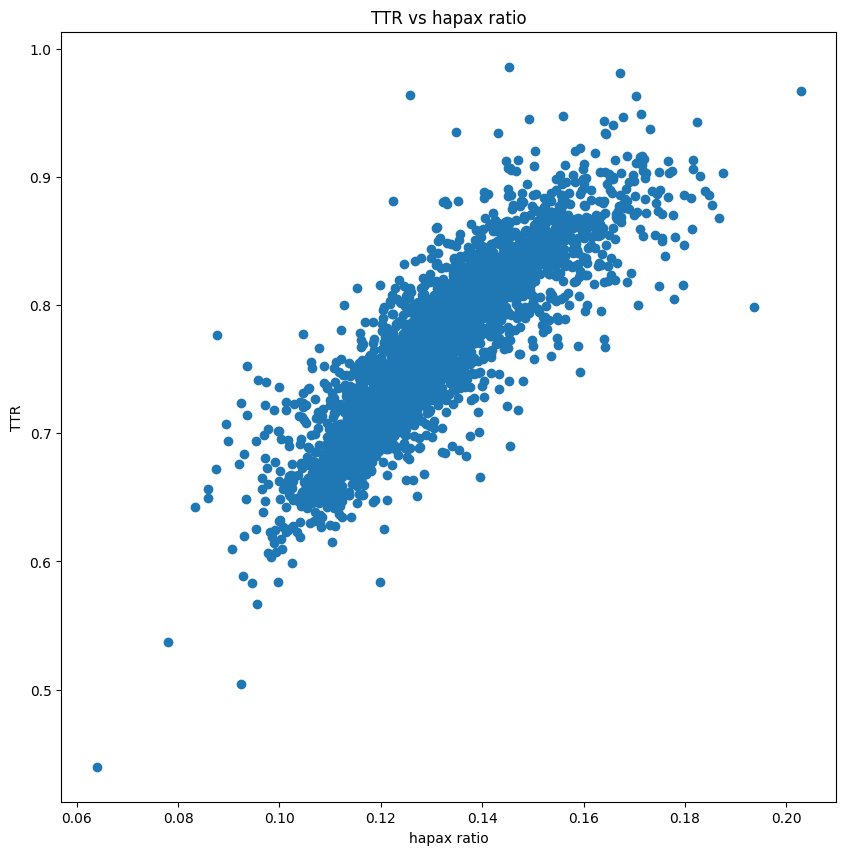

In [8]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

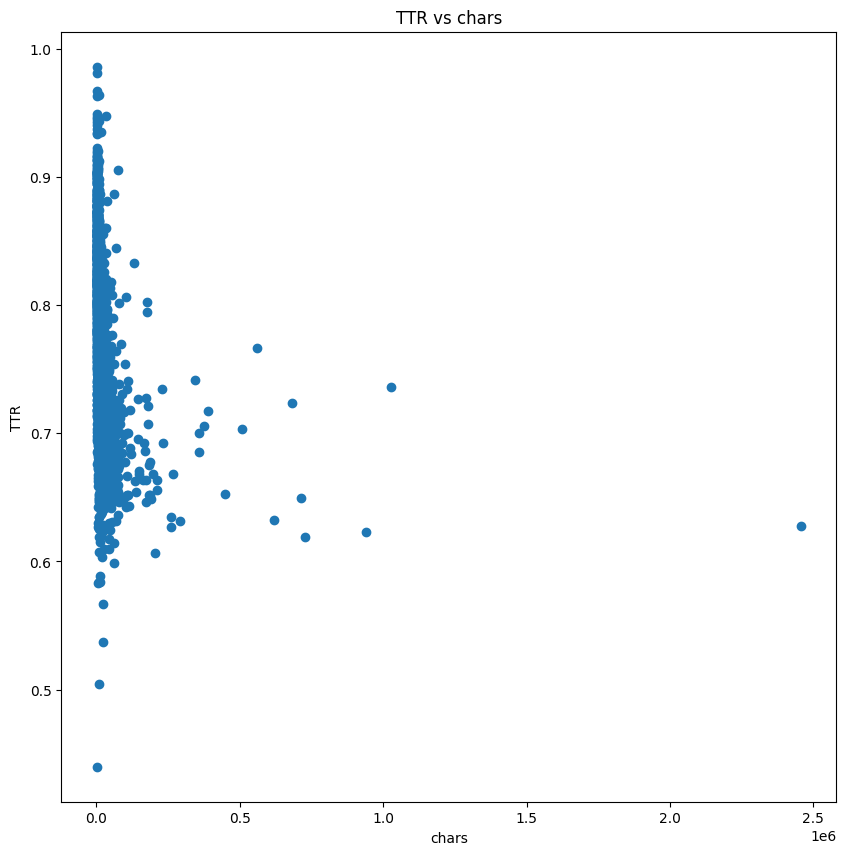

In [9]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

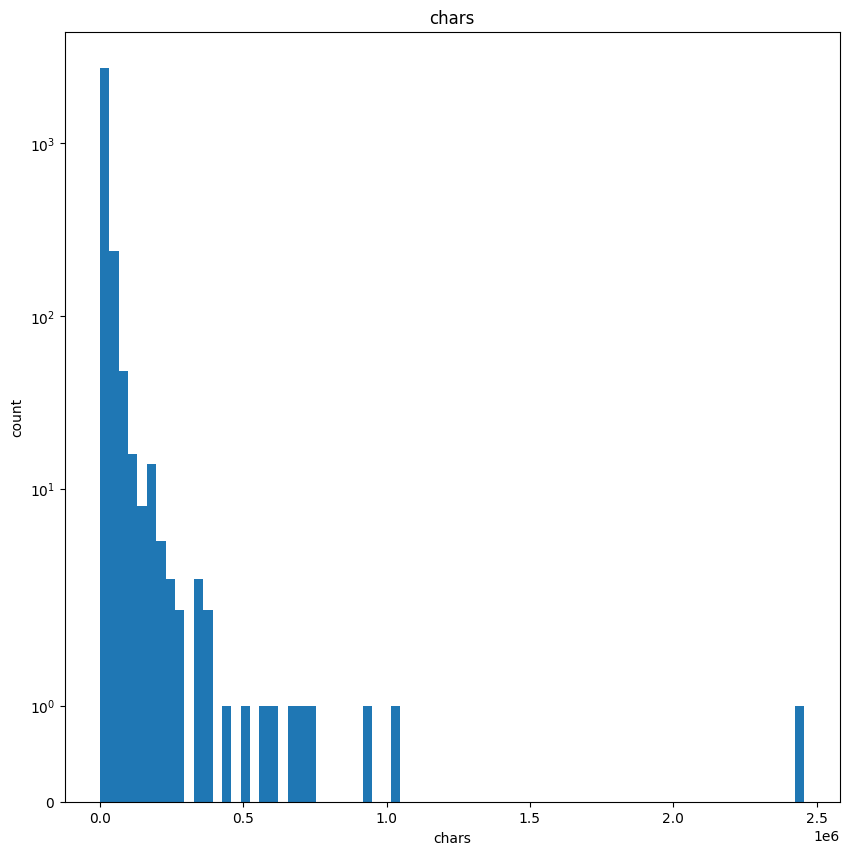

In [10]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

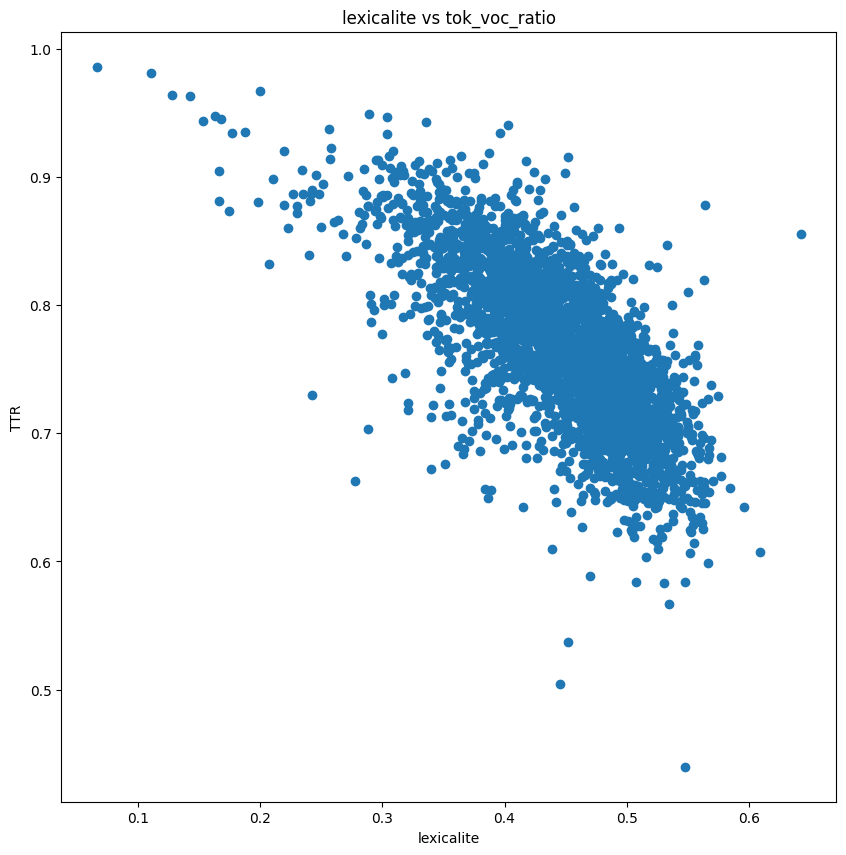

In [11]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [12]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [13]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-07-11', '@who': 'AB'},
 'creation': '1652-07-11',
 'dates': {'#text': '2 novembre 2021',
           '@type': 'file_creation',
           '@when': '2021-11-02'},
 'form': 'prose',
 'genre': ['récit', 'relation'],
 'handwritten_note': False,
 'illustration': False,
 'table_of_content': False,
 'titre': "Relation véritable de ce qui s'est fait et passé dans\n"
          "          l'audience donnée à Saint-Denys, le onzième juillet 1652, "
          'à messieurs les députés du\n'
          '          Parlement, avec les propres termes de la réponse à eux '
          'faite de la part du roi par\n'
          '          monsieur le garde des sceaux.'}


In [14]:
txt.ttr, txt.lexicalite

(0.7283317837572795, 0.4778386126227628)

In [15]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    # for k in stats:
    #     v = stats[k]
    #     v = [e for e in v if e]
    #     print(f"{k}: {mean(v):.3f}")
    #     stats[k] = v

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

prose: 0.753
vers: 0.819
('vers', 'prose'): 0.761
('prose', 'récit'): 0.788
('prose', 'manifeste'): 0.713


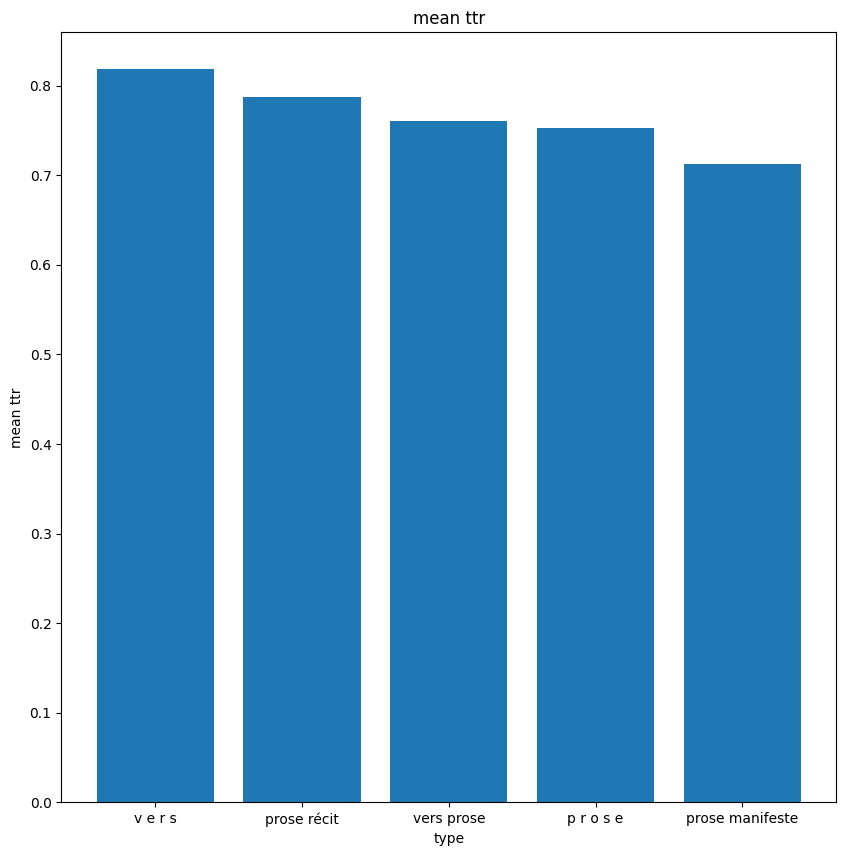

In [16]:
stats("ttr")


prose: 0.128
vers: 0.144
('vers', 'prose'): 0.132
('prose', 'récit'): 0.124
('prose', 'manifeste'): 0.118


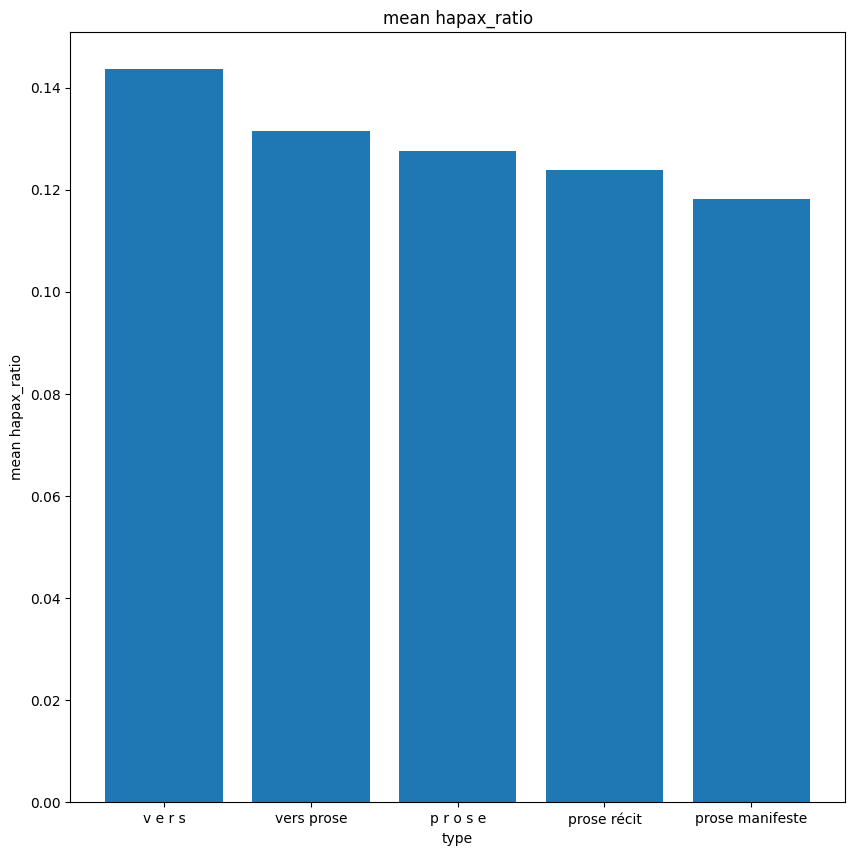

In [17]:
stats("hapax_ratio")

In [18]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


1652-07-11: 0.130
1652-09-26: 0.131
1649-03-04: 0.131
1652-04-28: 0.126
1650-10-01: 0.131
1649-02-19: 0.131
1648-04: 0.124
1652-07-13: 0.132
1652-08-07: 0.129
1652-03-16: 0.129
1651-10-08: 0.137
1652-02-28: 0.128
1652-04-07: 0.132
1652-01-01: 0.130
1649-01-18: 0.131
1651-04-18: 0.122
1649-04-01: 0.137
00-00-0000: 0.134
1652-05-04: 0.131
1649-09-05: 0.134
1651-07-06: 0.128
1649-12-11: 0.133
1650-05-09: 0.121
1649-03-15: 0.132
1649-02-08: 0.133
1651-04-05: 0.123
1652-08-19: 0.131
1649-02-03: 0.130
1651-09-07: 0.127
1649-07-17: 0.133
1651-09-13: 0.122
1651-03-11: 0.138
1651-08-17: 0.124
1650-07-04: 0.132
1652-09-24: 0.129
1652-08-23: 0.141
1651-12-12: 0.137


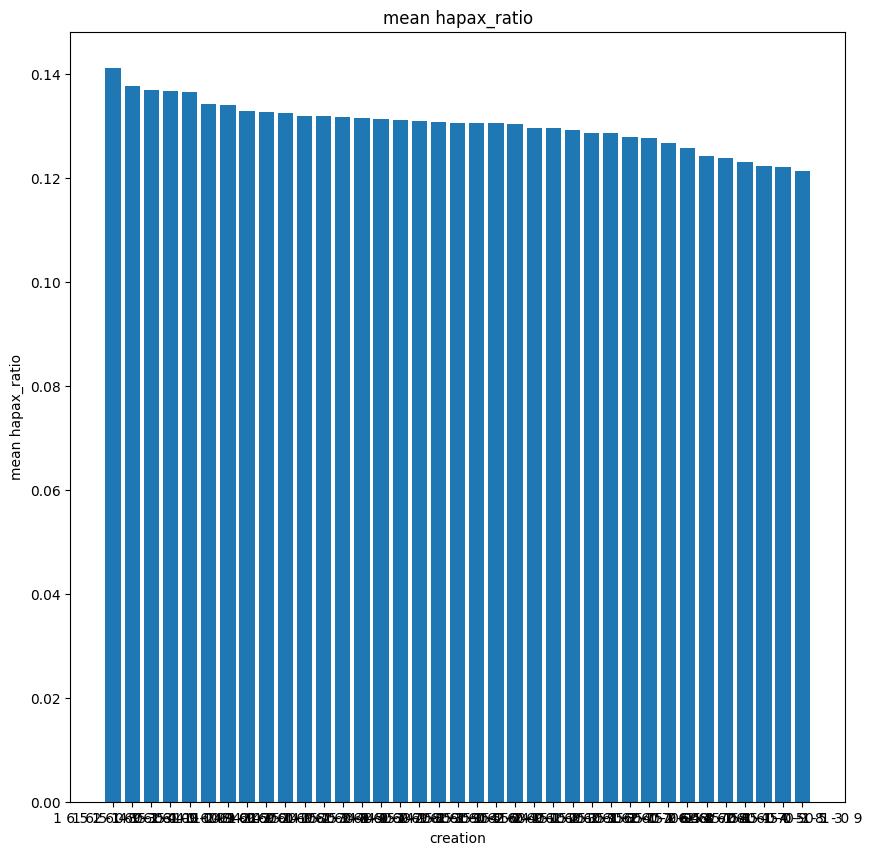

In [19]:
stats2("creation", "hapax_ratio")

1652-07-11: 0.762
1652-09-26: 0.755
1649-03-04: 0.769
1652-04-28: 0.740
1650-10-01: 0.764
1649-02-19: 0.767
1648-04: 0.742
1652-07-13: 0.755
1652-08-07: 0.751
1652-03-16: 0.752
1651-10-08: 0.784
1652-02-28: 0.751
1652-04-07: 0.767
1652-01-01: 0.762
1649-01-18: 0.770
1651-04-18: 0.723
1649-04-01: 0.792
00-00-0000: 0.783
1652-05-04: 0.762
1649-09-05: 0.778
1651-07-06: 0.753
1649-12-11: 0.767
1650-05-09: 0.720
1649-03-15: 0.766
1649-02-08: 0.762
1651-04-05: 0.719
1652-08-19: 0.756
1649-02-03: 0.763
1651-09-07: 0.746
1649-07-17: 0.772
1651-09-13: 0.723
1651-03-11: 0.795
1651-08-17: 0.744
1650-07-04: 0.763
1652-09-24: 0.757
1652-08-23: 0.789
1651-12-12: 0.792


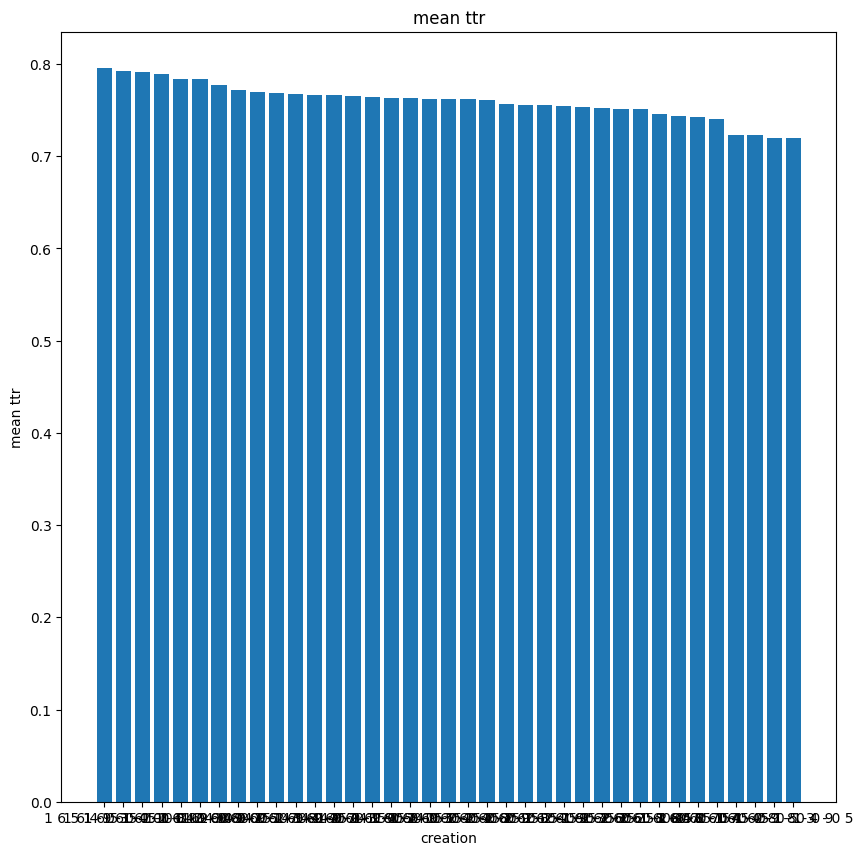

In [20]:
stats2("creation", "ttr")

False: 17056.011
True: 138307.333


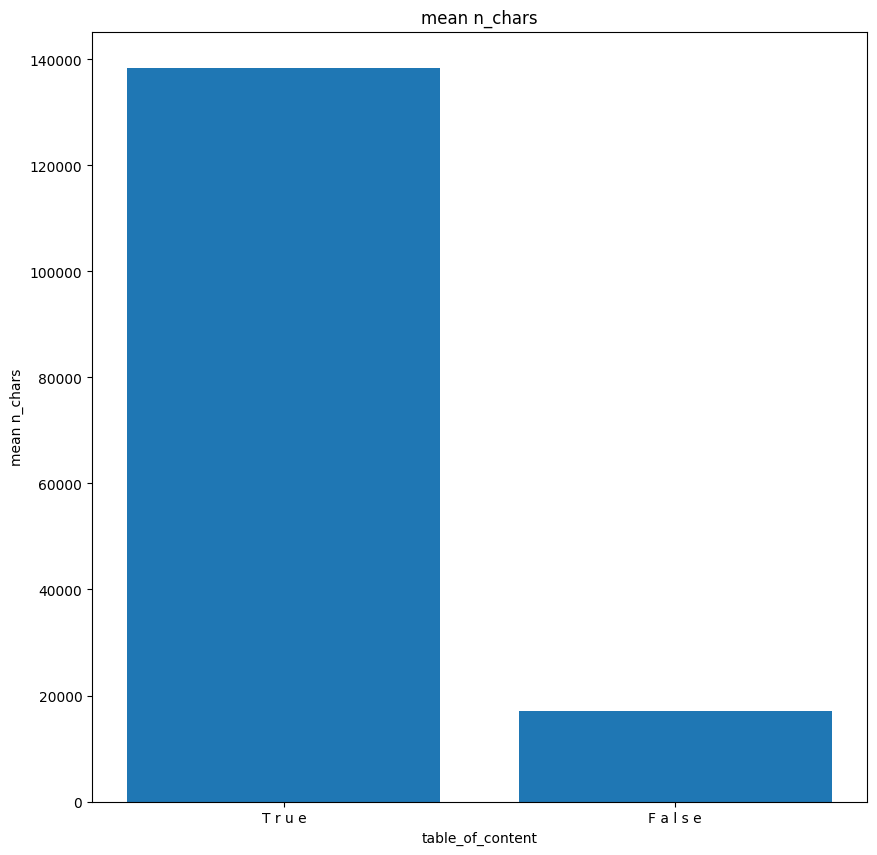

False: 0.767
True: 0.700


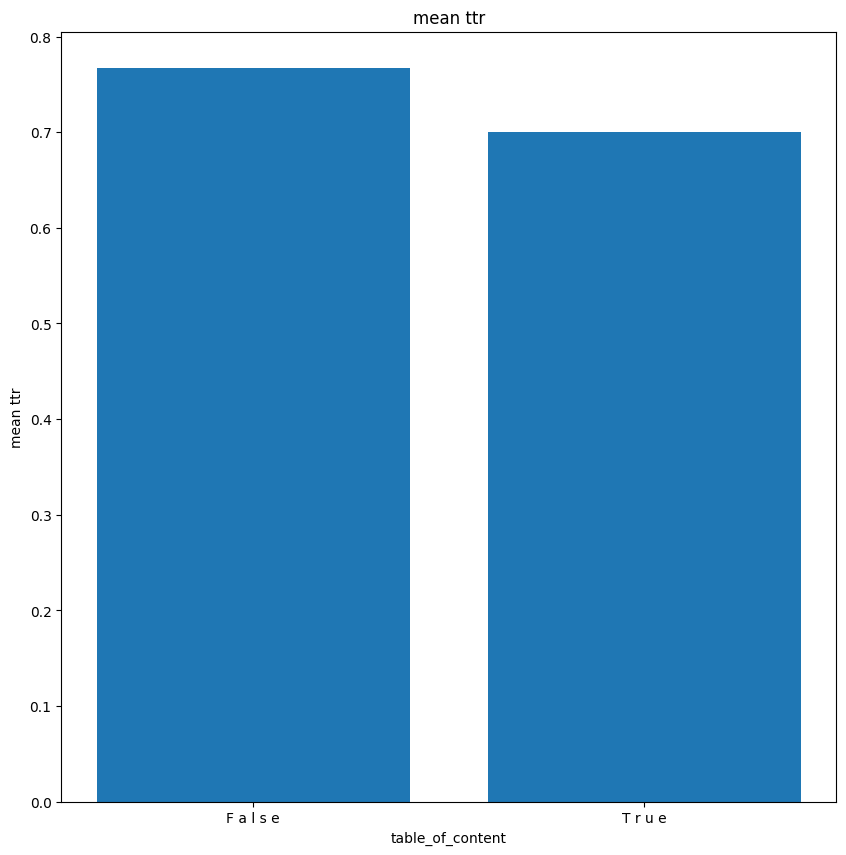

In [21]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [22]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î',
                'Ï', 'Ô',
                'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

(False, True, True, True)

In [23]:
def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

i, j, tot = 0, 0, 0

for txt in collection_textes:
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

print(i, j, tot, i / tot, j / tot)




5956 391 6347 0.9383960926421931 0.06160390735780684
3982 256 4238 0.9395941481831053 0.060405851816894764
4383 189 4572 0.9586614173228346 0.04133858267716536
10235 637 10872 0.9414091243561442 0.058590875643855775
6104 419 6523 0.9357657519546221 0.06423424804537789
7678 441 8119 0.9456829658824979 0.054317034117502154
6608 400 7008 0.9429223744292238 0.05707762557077625
1769 112 1881 0.9404572036150983 0.05954279638490165
4356 270 4626 0.9416342412451362 0.058365758754863814
13166 763 13929 0.9452221982913346 0.05477780170866538
31199 1733 32932 0.9473764120004858 0.05262358799951415
5213 305 5518 0.9447263501268576 0.05527364987314244
12750 760 13510 0.9437453737971873 0.056254626202812734
3840 252 4092 0.9384164222873901 0.06158357771260997
3723 203 3926 0.9482934284258787 0.05170657157412124
8416 454 8870 0.9488162344983089 0.05118376550169109
18002 1036 19038 0.945582519172182 0.05441748082781805
3964 164 4128 0.9602713178294574 0.03972868217054264
3715 250 3965 0.93694829760403

In [24]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [25]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [26]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

(0.43985568162728583, 568)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [27]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

(0.9859603415834419, 1894)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [28]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


(0.06391675956893349, 568)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [29]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


(0.2028985507246377, 1835)


{'form': 'prose',
 'subject': 'Paris (France)',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Le généreux prince aux Parisiens de mourir pour le\n          service du roi et de ne point souffrir le retour du cardinal Mazarin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [30]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


(0.06577772953152893, 1894)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [31]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


(0.6429080135814482, 613)


{'form': 'prose',
 'genre': 'non renseigné',
 'subject': None,
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-13',
 'change': {'@status': 'corrected', '@when': '2022-07-11', '@who': 'MF'},
 'titre': 'Les profanations mazariniques, ou le Truchement de\n          Saint-Denys apportant des nouvelles de sa désolation, par le sieur de La Campie,\n          gentilhomme périgourdin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [32]:
collection_textes[1876].lexicalite


0.5098256929880068

In [35]:
to_save = [
    (ttrlist[-1][1], "ttr_min"),
    (ttrlist[0][1], "ttr_max"),
    (hapaxlist[-1][1], "hapax_min"),
    (hapaxlist[0][1], "hapax_max"),
    (lexicalitelist[-1][1], "lexicalite_min"),
    (lexicalitelist[0][1], "lexicalite_max"),
]

from pathlib import Path

Path("extremes").mkdir(parents=True, exist_ok=True)
for i, name in to_save:
    txt = collection_textes[i]
    with open(f"extremes/{name}.txt", "w") as f:
        f.write('\n'.join(txt.pages))
